In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns=["Class","Text"]

In [8]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["Label"]=df["Class"].map({"ham":0,"spam":1})

In [10]:
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


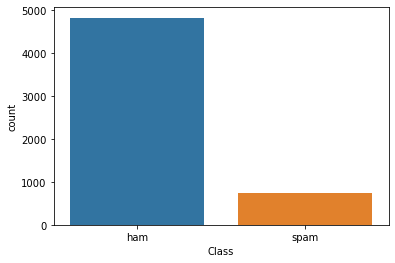

In [11]:
sns.countplot(x=df["Class"]);

In [12]:
df['Text']=df['Text'].str.lower()#kucuk harfe ceviri
df['Text']=df['Text'].str.replace('[^\w\s]','')#nooktala isartlerini kaldirma
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\n',' ').replace('\r',' ')

In [14]:
from wordcloud import STOPWORDS
from PIL import Image 
import numpy as np

In [33]:
def wc(data ,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("alice_mask.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [34]:
ham=df[df["Class"]=='ham']["Text"]

In [35]:
spam=df[df["Class"]=='spam']["Text"]

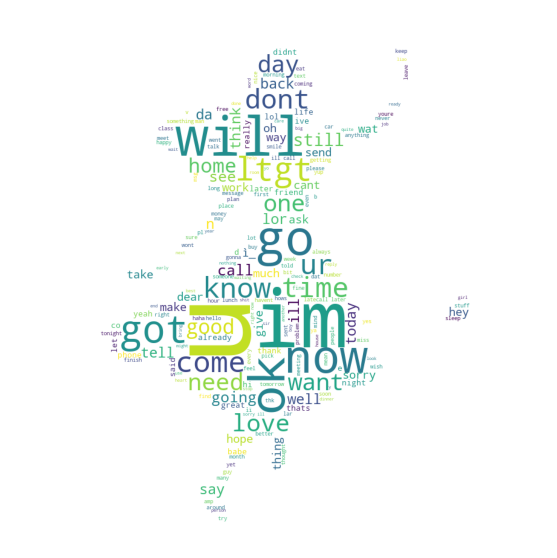

In [36]:
wc(ham,'white')

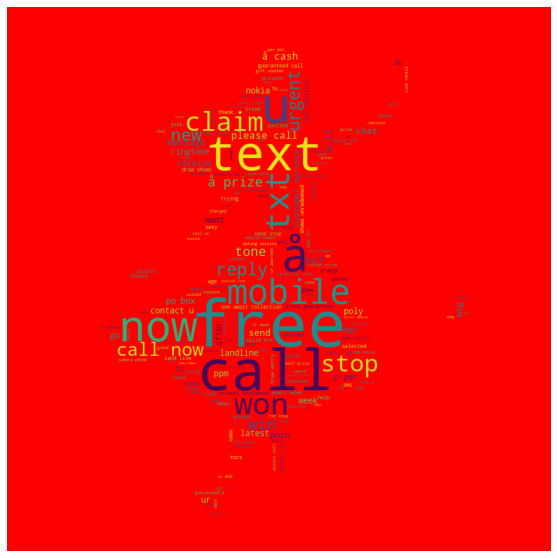

In [37]:
wc(spam,'red')

In [20]:
x=df["Text"]
y=df["Label"]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
vect=CountVectorizer(stop_words="english")

In [23]:
x=vect.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [25]:
mb=MultinomialNB()

In [26]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [27]:
accuracy_score(tahmin,y_test)

0.9712849964106246